# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [7]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
%matplotlib inline

path="C:\Local Disk Custom\Edu\Data Science\Springboard\Guided Capstone\Step 2"
os.chdir(path) 

filename = 'data\step3_output.csv'
df = pd.read_csv(filename)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 26 columns):
Name                 167 non-null object
state                167 non-null object
summit_elev          167 non-null int64
vertical_drop        167 non-null int64
trams                167 non-null int64
fastEight            167 non-null float64
fastSixes            167 non-null int64
fastQuads            167 non-null int64
quad                 167 non-null int64
triple               167 non-null int64
double               167 non-null int64
surface              167 non-null int64
total_chairs         167 non-null int64
Runs                 167 non-null float64
TerrainParks         167 non-null float64
LongestRun_mi        167 non-null float64
SkiableTerrain_ac    167 non-null float64
Snow Making_ac       167 non-null float64
daysOpenLastYear     167 non-null float64
yearsOpen            167 non-null float64
averageSnowfall      167 non-null float64
AdultWeekday         167 non-null f

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [124]:
X = df.drop(['Name', 'state', 'AdultWeekend', 'summit_elev'], axis=1)
y = df.AdultWeekend
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred = model.predict(X_test)
var = explained_variance_score(y_test, y_pred)
print("Explained Variance Score= ",var)
mea = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error= ",mea)
coefs = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
coefs.Coefficient.sort_values(ascending=False).head(10)

Explained Variance Score=  0.5430892047947207
Mean Absolute Error=  7.256975335702147


AdultWeekday         10.742995
averageSnowfall       2.882345
clusters              2.248432
vertical_drop         1.943369
SkiableTerrain_ac     1.728871
daysOpenLastYear      1.518501
triple                1.208903
Runs                  0.984096
NightSkiing_ac        0.978265
surface               0.950552
Name: Coefficient, dtype: float64

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [30]:
#BIG MOUNTAIN RESORT has problems with the initial problem statement. So, try the model with any other resort's data.
bmr = df[df['Name'].str.contains('Big Snow Resort - Indianhead Mountain')]
bmr.T

,48
Name,Big Snow Resort - Indianhead Mountain
state,Michigan
summit_elev,1935
vertical_drop,638
trams,0
fastEight,0
fastSixes,0
fastQuads,0
quad,1
triple,1


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [52]:
bmr_x_test = scaler.transform(bmr.drop(['Name', 'state', 'AdultWeekend', 'summit_elev'], axis=1))
bmr_y_test = int(bmr['AdultWeekend'])

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [53]:
bmr_pred = int(model.predict(bmr_x_test))
print('Predicted Adult weekend price: $',bmr_pred)

Predicted Adult weekend price: $ 55


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [51]:
print('Actual Adult weekend price: $', bmr_y_test)

Actual Adult weekend price: $ 49


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

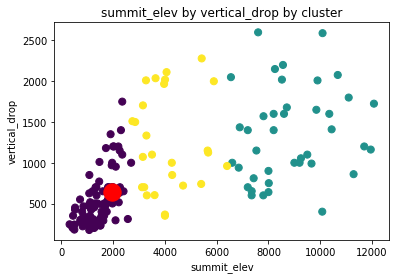

In [99]:
plt.scatter(df['summit_elev'], df['vertical_drop'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(bmr['summit_elev'], bmr['vertical_drop'], c='red', s=300)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

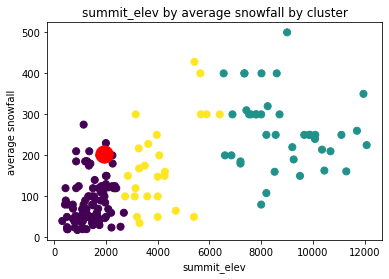

In [100]:
plt.scatter(df['summit_elev'], df['averageSnowfall'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(bmr['summit_elev'], bmr['averageSnowfall'], c='red', s=300)
plt.xlabel('summit_elev')
plt.ylabel('average snowfall')
plt.title('summit_elev by average snowfall by cluster')
plt.savefig('figures/fig2.png',bbox_inches='tight')

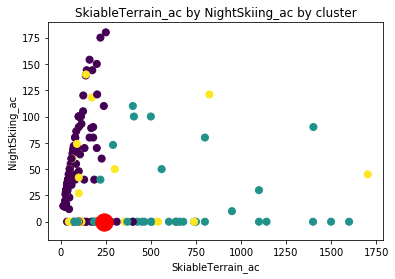

In [101]:
plt.scatter(df['SkiableTerrain_ac'], df['NightSkiing_ac'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(bmr['SkiableTerrain_ac'], bmr['NightSkiing_ac'], c='red', s=300)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('NightSkiing_ac')
plt.title('SkiableTerrain_ac by NightSkiing_ac by cluster')
plt.savefig('figures/fig3.png',bbox_inches='tight')

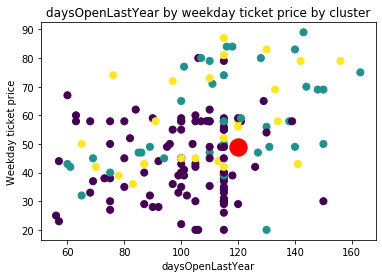

In [102]:
plt.scatter(df['daysOpenLastYear'], df['AdultWeekday'], c=df['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(bmr['daysOpenLastYear'], bmr['AdultWeekday'], c='red', s=300)
plt.xlabel('daysOpenLastYear')
plt.ylabel('Weekday ticket price')
plt.title('daysOpenLastYear by weekday ticket price by cluster')
plt.savefig('figures/fig4.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [103]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [161]:
df_mod = coefs.T
df_mod.reset_index(drop=True, inplace=True)
df_mod.set_index(pd.Index(['BMR model']), inplace=True)
df_mod = df_mod.T['BMR model'].sort_values(ascending=False)
df_mod = pd.DataFrame(df_mod).T
df_mod['Explained Variance'] = var
df_mod['Mean Absolute Error'] = mea
data_path = path + '\models\model_doc.csv'
df_mod.to_csv(data_path)
df_mod

,AdultWeekday,averageSnowfall,clusters,vertical_drop,SkiableTerrain_ac,daysOpenLastYear,triple,Runs,NightSkiing_ac,surface,...,Snow Making_ac,projectedDaysOpen,fastQuads,yearsOpen,LongestRun_mi,trams,fastEight,fastSixes,Explained Variance,Mean Absolute Error
BMR model,10.742995,2.882345,2.248432,1.943369,1.728871,1.518501,1.208903,0.984096,0.978265,0.950552,...,0.23827,0.195094,0.066916,0.025117,0.022425,4.440892e-16,2.220446e-16,0.0,0.543089,7.256975
